In [6]:
import sys, os

# Change directory to project root
os.chdir(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Add project root to path
sys.path.append(os.getcwd())

print("Current directory:", os.getcwd())

# Add project root to Python path so "src" becomes importable
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("Project root added:", project_root)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.data.multi_loader import load_all_subsets
from src.features.preprocess import (
    compute_rul,
    scale_features,
    make_delta_features,
    make_rolling_features
)

plt.style.use("seaborn-v0_8")


Current directory: c:\Users\mulla\Documents\ML Hackathon\Project NASA TurboJet Engine\turbofan-ml-project-scaffold
Project root added: c:\Users\mulla\Documents\ML Hackathon\Project NASA TurboJet Engine


In [7]:
data_dict = load_all_subsets("data/raw")

data_dict.keys()


dict_keys(['FD001', 'FD002', 'FD003', 'FD004'])

In [8]:
for key, df in data_dict.items():
    print(f"\n--- {key} ---")
    display(df.head())
    print(df.describe())



--- FD001 ---


,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


          engine_id         cycle  op_setting_1  op_setting_2  op_setting_3  \
count  20631.000000  20631.000000  20631.000000  20631.000000       20631.0   
mean      51.506568    108.807862     -0.000009      0.000002         100.0   
std       29.227633     68.880990      0.002187      0.000293           0.0   
min        1.000000      1.000000     -0.008700     -0.000600         100.0   
25%       26.000000     52.000000     -0.001500     -0.000200         100.0   
50%       52.000000    104.000000      0.000000      0.000000         100.0   
75%       77.000000    156.000000      0.001500      0.000300         100.0   
max      100.000000    362.000000      0.008700      0.000600         100.0   

       sensor_1      sensor_2      sensor_3      sensor_4      sensor_5  ...  \
count  20631.00  20631.000000  20631.000000  20631.000000  2.063100e+04  ...   
mean     518.67    642.680934   1590.523119   1408.933782  1.462000e+01  ...   
std        0.00      0.500053      6.131150     

,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286


          engine_id         cycle  op_setting_1  op_setting_2  op_setting_3  \
count  53759.000000  53759.000000  53759.000000  53759.000000  53759.000000   
mean     131.082981    109.154746     23.998407      0.572056     94.046020   
std       74.463862     69.180569     14.747376      0.310016     14.237735   
min        1.000000      1.000000      0.000000      0.000000     60.000000   
25%       68.000000     52.000000     10.004600      0.250700    100.000000   
50%      131.000000    104.000000     25.001300      0.700000    100.000000   
75%      195.000000    157.000000     41.998000      0.840000    100.000000   
max      260.000000    378.000000     42.008000      0.842000    100.000000   

           sensor_1      sensor_2      sensor_3      sensor_4      sensor_5  \
count  53759.000000  53759.000000  53759.000000  53759.000000  53759.000000   
mean     472.910207    579.672399   1419.971013   1205.442024      8.031986   
std       26.389707     37.289399    105.946341    

,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,522.31,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,522.42,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,522.03,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,522.49,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,522.58,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583


          engine_id         cycle  op_setting_1  op_setting_2  op_setting_3  \
count  24720.000000  24720.000000  24720.000000  24720.000000       24720.0   
mean      48.631877    139.077063     -0.000024      0.000005         100.0   
std       29.348985     98.846675      0.002194      0.000294           0.0   
min        1.000000      1.000000     -0.008600     -0.000600         100.0   
25%       23.000000     62.000000     -0.001500     -0.000200         100.0   
50%       47.000000    124.000000     -0.000000     -0.000000         100.0   
75%       74.000000    191.000000      0.001500      0.000300         100.0   
max      100.000000    525.000000      0.008600      0.000700         100.0   

       sensor_1      sensor_2      sensor_3      sensor_4      sensor_5  ...  \
count  24720.00  24720.000000  24720.000000  24720.000000  2.472000e+04  ...   
mean     518.67    642.457858   1588.079175   1404.471212  1.462000e+01  ...   
std        0.00      0.523031      6.810418     

,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754


          engine_id         cycle  op_setting_1  op_setting_2  op_setting_3  \
count  61249.000000  61249.000000  61249.000000  61249.000000  61249.000000   
mean     124.325181    134.311417     23.999823      0.571347     94.031576   
std       71.995350     89.783389     14.780722      0.310703     14.251954   
min        1.000000      1.000000      0.000000      0.000000     60.000000   
25%       60.000000     62.000000     10.004600      0.250700    100.000000   
50%      126.000000    123.000000     25.001400      0.700000    100.000000   
75%      185.000000    191.000000     41.998100      0.840000    100.000000   
max      249.000000    543.000000     42.008000      0.842000    100.000000   

           sensor_1      sensor_2      sensor_3      sensor_4      sensor_5  \
count  61249.000000  61249.000000  61249.000000  61249.000000  61249.000000   
mean     472.882435    579.420056   1417.896600   1201.915359      8.031626   
std       26.436832     37.342647    106.167598    

In [9]:
for key in data_dict:
    data_dict[key] = compute_rul(data_dict[key])


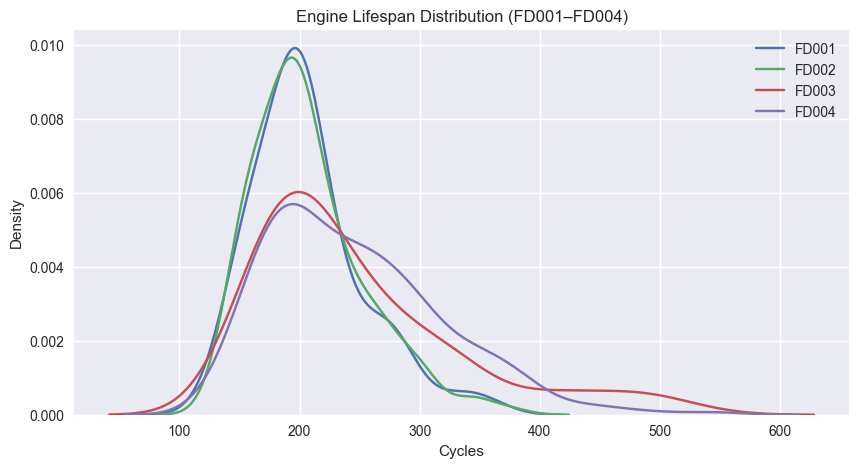

In [10]:
lifespans = {}

for key, df in data_dict.items():
    lifespans[key] = df.groupby("engine_id")["cycle"].max()

plt.figure(figsize=(10,5))
for key, life in lifespans.items():
    sns.kdeplot(life, label=key)
plt.legend()
plt.title("Engine Lifespan Distribution (FD001–FD004)")
plt.xlabel("Cycles")
plt.ylabel("Density")
plt.show()


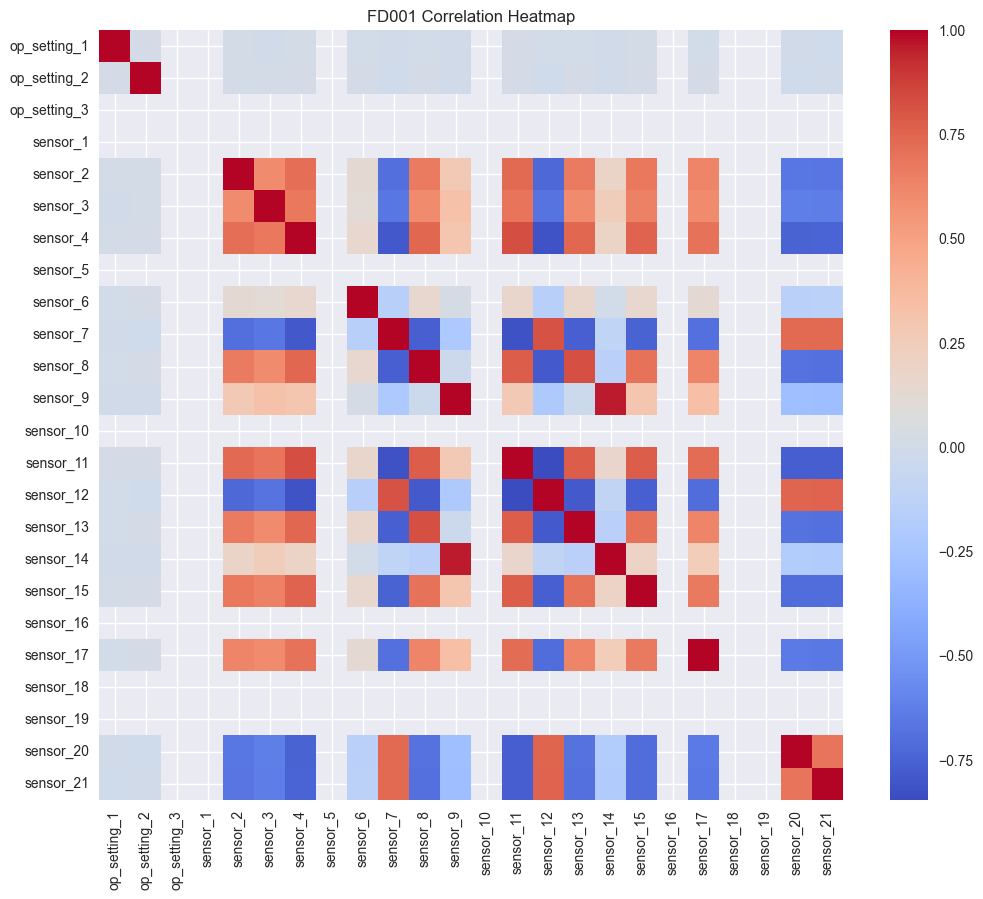

In [11]:
features = [c for c in data_dict['FD001'].columns if 'sensor' in c or 'op_setting' in c]

corr = data_dict['FD001'][features].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm")
plt.title("FD001 Correlation Heatmap")
plt.show()


In [12]:
df = data_dict['FD001'].copy()

df = make_delta_features(df, features)
df = make_rolling_features(df, features, window=5)

display(df.head())


,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12_roll_mean,sensor_13_roll_mean,sensor_14_roll_mean,sensor_15_roll_mean,sensor_16_roll_mean,sensor_17_roll_mean,sensor_18_roll_mean,sensor_19_roll_mean,sensor_20_roll_mean,sensor_21_roll_mean
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.282,2388.048,8134.194,8.41334,0.03,391.8,2388.0,100.0,38.958,23.39302


In [13]:
df_scaled, scaler = scale_features(df)

df_scaled.head()


,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12_roll_mean,sensor_13_roll_mean,sensor_14_roll_mean,sensor_15_roll_mean,sensor_16_roll_mean,sensor_17_roll_mean,sensor_18_roll_mean,sensor_19_roll_mean,sensor_20_roll_mean,sensor_21_roll_mean
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.816337,0.260204,0.172934,0.264082,0.0,0.236842,0.0,0.0,0.734884,0.769768


In [19]:
import pandas as pd

out_path_parquet = "data/processed/FD001_processed.parquet"
out_path_pickle = "data/processed/FD001_processed.pkl"

try:
    df_scaled.to_parquet(out_path_parquet, engine="pyarrow", index=False)
except Exception as e:
    msg = str(e).lower()
    if "pandas.period" in msg or "type extension with name pandas.period" in msg:
        # convert Period dtypes (if any) to strings and retry
        df_tmp = df_scaled.copy()
        period_cols = [c for c in df_tmp.columns if pd.api.types.is_period_dtype(df_tmp[c])]
        if period_cols:
            df_tmp[period_cols] = df_tmp[period_cols].astype(str)
        try:
            df_tmp.to_parquet(out_path_parquet, engine="pyarrow", index=False)
        except Exception:
            # try fastparquet if installed
            try:
                df_tmp.to_parquet(out_path_parquet, engine="fastparquet", index=False)
            except Exception as e2:
                df_tmp.to_pickle(out_path_pickle)
                print("Parquet failed, saved as pickle. Last error:", e2)
    else:
        raise

C:\Users\mulla\AppData\Local\Temp\ipykernel_11864\3949722103.py:13: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  period_cols = [c for c in df_tmp.columns if pd.api.types.is_period_dtype(df_tmp[c])]


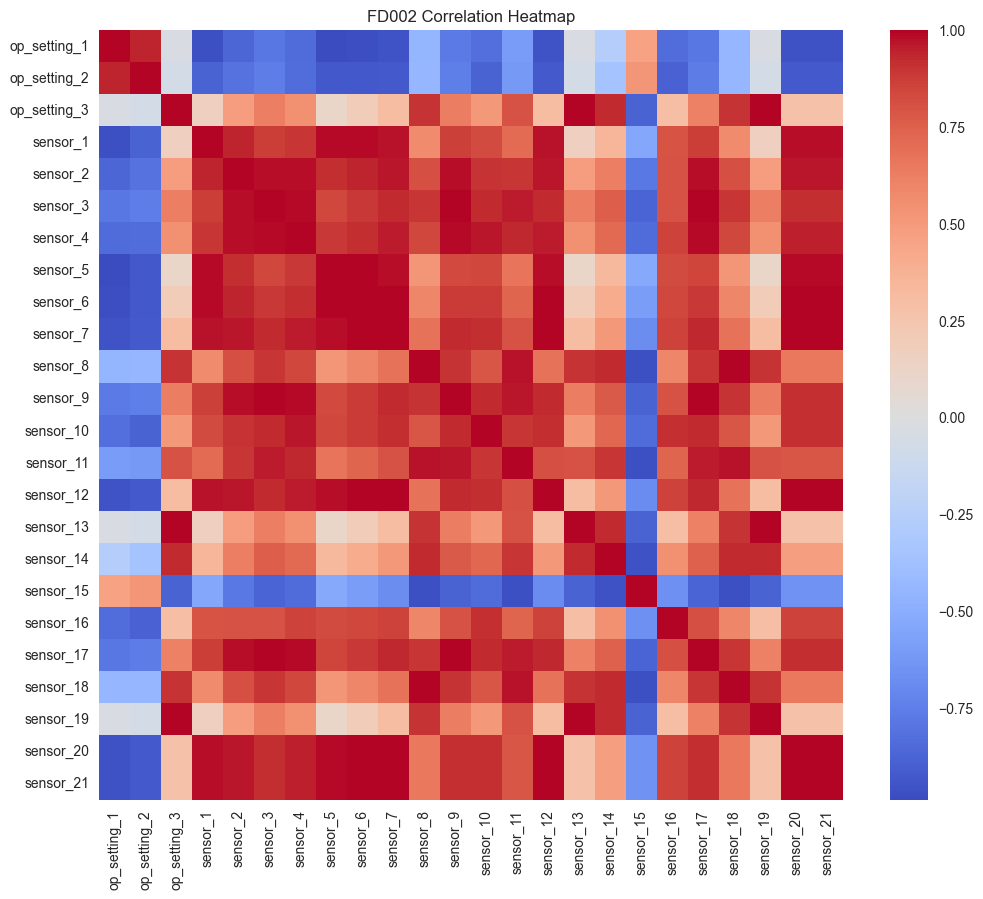

In [20]:
features = [c for c in data_dict['FD002'].columns if 'sensor' in c or 'op_setting' in c]

corr = data_dict['FD002'][features].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm")
plt.title("FD002 Correlation Heatmap")
plt.show()


In [21]:
df = data_dict['FD003'].copy()

df = make_delta_features(df, features)
df = make_rolling_features(df, features, window=5)

display(df.head())


,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12_roll_mean,sensor_13_roll_mean,sensor_14_roll_mean,sensor_15_roll_mean,sensor_16_roll_mean,sensor_17_roll_mean,sensor_18_roll_mean,sensor_19_roll_mean,sensor_20_roll_mean,sensor_21_roll_mean
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,522.366,2388.03,8148.54,8.40594,0.03,391.6,2388.0,100.0,39.01,23.38462


In [22]:
df_scaled, scaler = scale_features(df)

df_scaled.head()


,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12_roll_mean,sensor_13_roll_mean,sensor_14_roll_mean,sensor_15_roll_mean,sensor_16_roll_mean,sensor_17_roll_mean,sensor_18_roll_mean,sensor_19_roll_mean,sensor_20_roll_mean,sensor_21_roll_mean
0,1,1,0.470930,0.769231,0.0,0.0,0.355972,0.370523,0.308580,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,0.546512,0.230769,0.0,0.0,0.388759,0.399100,0.309360,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,0.418605,0.307692,0.0,0.0,0.313817,0.353298,0.445398,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,0.383721,0.538462,0.0,0.0,0.487119,0.417107,0.237285,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,0.593023,0.461538,0.0,0.0,0.196721,0.476218,0.321217,0.0,...,0.218458,0.581359,0.27245,0.594362,0.0,0.288889,0.0,0.0,0.496513,0.45597


In [24]:
import pandas as pd

out_path_parquet = "data/processed/FD002_processed.parquet"
out_path_pickle = "data/processed/FD002_processed.pkl"

try:
    df_scaled.to_parquet(out_path_parquet, engine="pyarrow", index=False)
except Exception as e:
    msg = str(e).lower()
    if "pandas.period" in msg or "type extension with name pandas.period" in msg:
        # convert Period dtypes (if any) to strings and retry
        df_tmp = df_scaled.copy()
        period_cols = [c for c in df_tmp.columns if pd.api.types.is_period_dtype(df_tmp[c])]
        if period_cols:
            df_tmp[period_cols] = df_tmp[period_cols].astype(str)
        try:
            df_tmp.to_parquet(out_path_parquet, engine="pyarrow", index=False)
        except Exception:
            # try fastparquet if installed
            try:
                df_tmp.to_parquet(out_path_parquet, engine="fastparquet", index=False)
            except Exception as e2:
                df_tmp.to_pickle(out_path_pickle)
                print("Parquet failed, saved as pickle. Last error:", e2)
    else:
        raise

C:\Users\mulla\AppData\Local\Temp\ipykernel_11864\1074496970.py:13: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  period_cols = [c for c in df_tmp.columns if pd.api.types.is_period_dtype(df_tmp[c])]


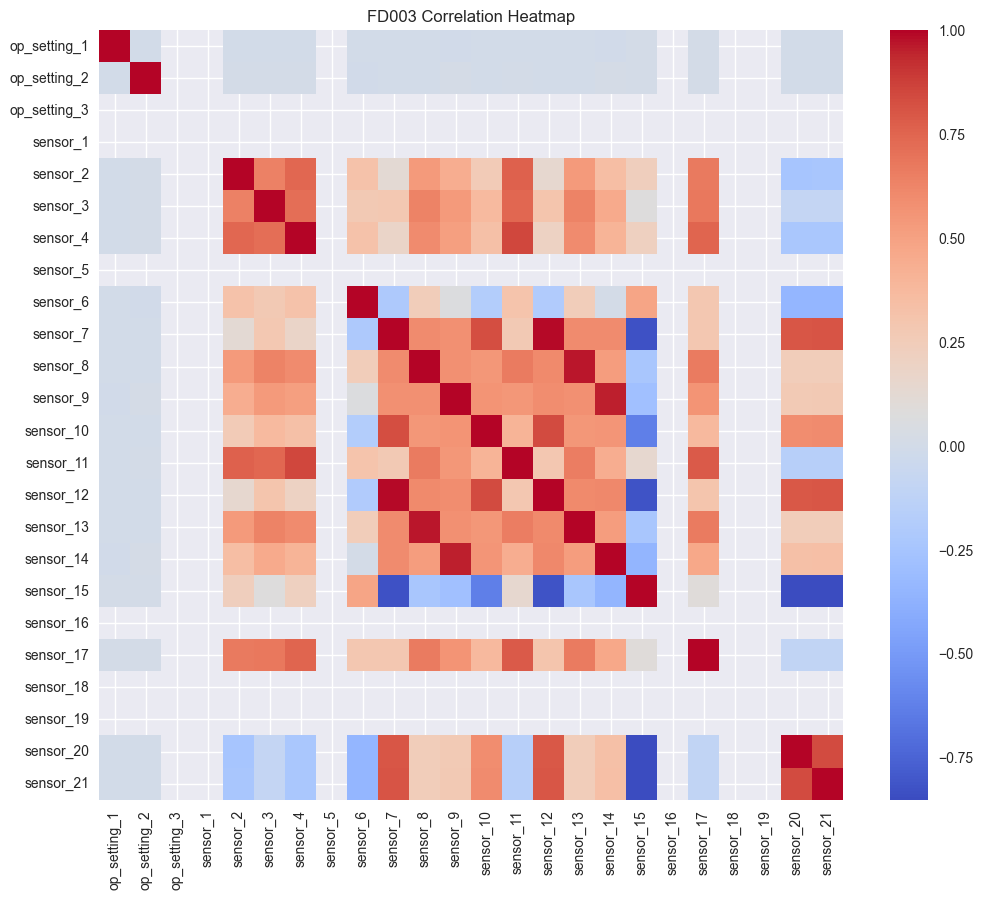

In [25]:
features = [c for c in data_dict['FD003'].columns if 'sensor' in c or 'op_setting' in c]

corr = data_dict['FD003'][features].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm")
plt.title("FD003 Correlation Heatmap")
plt.show()


In [26]:
df = data_dict['FD003'].copy()

df = make_delta_features(df, features)
df = make_rolling_features(df, features, window=5)

display(df.head())


,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12_roll_mean,sensor_13_roll_mean,sensor_14_roll_mean,sensor_15_roll_mean,sensor_16_roll_mean,sensor_17_roll_mean,sensor_18_roll_mean,sensor_19_roll_mean,sensor_20_roll_mean,sensor_21_roll_mean
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,522.366,2388.03,8148.54,8.40594,0.03,391.6,2388.0,100.0,39.01,23.38462


In [27]:
df_scaled, scaler = scale_features(df)

df_scaled.head()


,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12_roll_mean,sensor_13_roll_mean,sensor_14_roll_mean,sensor_15_roll_mean,sensor_16_roll_mean,sensor_17_roll_mean,sensor_18_roll_mean,sensor_19_roll_mean,sensor_20_roll_mean,sensor_21_roll_mean
0,1,1,0.470930,0.769231,0.0,0.0,0.355972,0.370523,0.308580,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,0.546512,0.230769,0.0,0.0,0.388759,0.399100,0.309360,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,0.418605,0.307692,0.0,0.0,0.313817,0.353298,0.445398,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,0.383721,0.538462,0.0,0.0,0.487119,0.417107,0.237285,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,0.593023,0.461538,0.0,0.0,0.196721,0.476218,0.321217,0.0,...,0.218458,0.581359,0.27245,0.594362,0.0,0.288889,0.0,0.0,0.496513,0.45597


In [28]:
import pandas as pd

out_path_parquet = "data/processed/FD003_processed.parquet"
out_path_pickle = "data/processed/FD003_processed.pkl"

try:
    df_scaled.to_parquet(out_path_parquet, engine="pyarrow", index=False)
except Exception as e:
    msg = str(e).lower()
    if "pandas.period" in msg or "type extension with name pandas.period" in msg:
        # convert Period dtypes (if any) to strings and retry
        df_tmp = df_scaled.copy()
        period_cols = [c for c in df_tmp.columns if pd.api.types.is_period_dtype(df_tmp[c])]
        if period_cols:
            df_tmp[period_cols] = df_tmp[period_cols].astype(str)
        try:
            df_tmp.to_parquet(out_path_parquet, engine="pyarrow", index=False)
        except Exception:
            # try fastparquet if installed
            try:
                df_tmp.to_parquet(out_path_parquet, engine="fastparquet", index=False)
            except Exception as e2:
                df_tmp.to_pickle(out_path_pickle)
                print("Parquet failed, saved as pickle. Last error:", e2)
    else:
        raise

C:\Users\mulla\AppData\Local\Temp\ipykernel_11864\3696298197.py:13: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  period_cols = [c for c in df_tmp.columns if pd.api.types.is_period_dtype(df_tmp[c])]


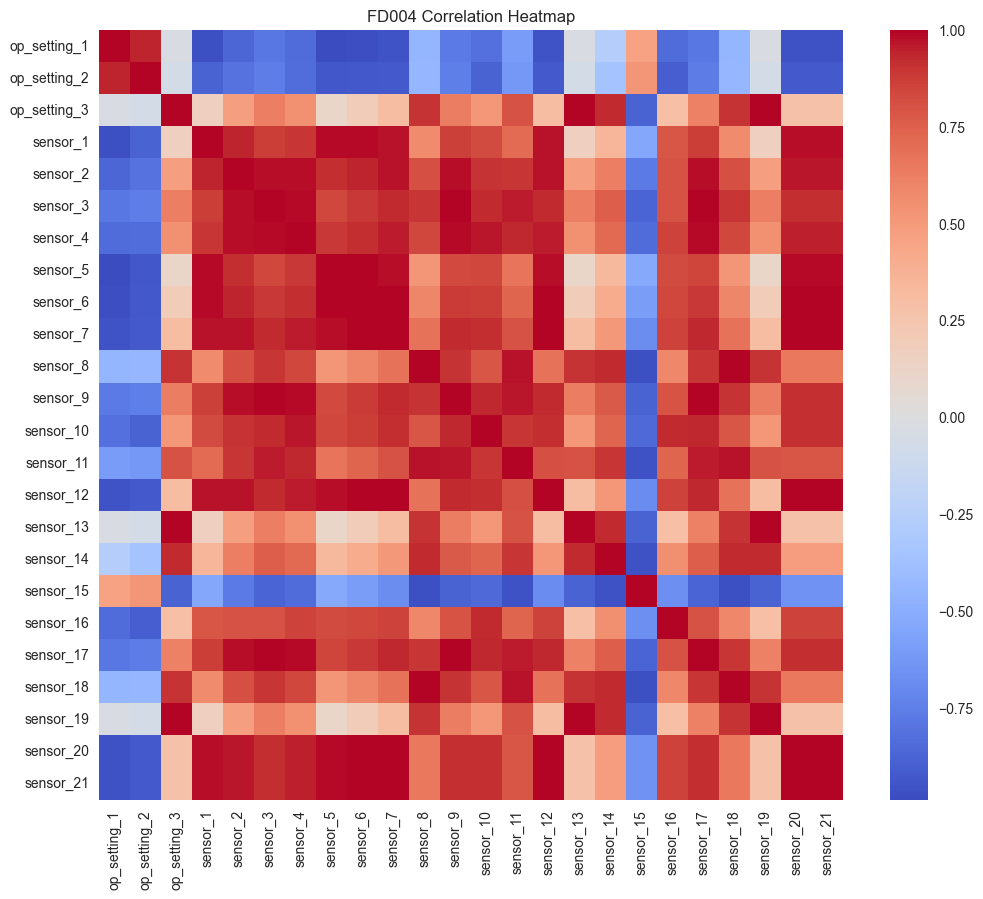

In [29]:
features = [c for c in data_dict['FD004'].columns if 'sensor' in c or 'op_setting' in c]

corr = data_dict['FD004'][features].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm")
plt.title("FD004 Correlation Heatmap")
plt.show()


In [30]:
df = data_dict['FD004'].copy()

df = make_delta_features(df, features)
df = make_rolling_features(df, features, window=5)

display(df.head())


,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12_roll_mean,sensor_13_roll_mean,sensor_14_roll_mean,sensor_15_roll_mean,sensor_16_roll_mean,sensor_17_roll_mean,sensor_18_roll_mean,sensor_19_roll_mean,sensor_20_roll_mean,sensor_21_roll_mean
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,173.18,2315.958,8025.886,9.6198,0.02,330.6,2175.0,96.986,14.008,8.5073


In [31]:
df_scaled, scaler = scale_features(df)

df_scaled.head()


,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12_roll_mean,sensor_13_roll_mean,sensor_14_roll_mean,sensor_15_roll_mean,sensor_16_roll_mean,sensor_17_roll_mean,sensor_18_roll_mean,sensor_19_roll_mean,sensor_20_roll_mean,sensor_21_roll_mean
0,1,1,0.999926,0.997625,1.0,0.000000,0.130347,0.272082,0.212586,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,0.476147,0.831591,1.0,0.626985,0.647971,0.634407,0.511781,0.507937,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,0.999900,0.998694,1.0,0.000000,0.123646,0.271245,0.222481,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,0.999810,0.997625,1.0,0.000000,0.121351,0.266168,0.224835,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,0.595275,0.737173,0.0,0.238089,0.005691,0.033916,0.022025,0.293184,...,0.112084,0.796039,0.440408,0.491465,0.0,0.285393,0.549683,0.8,0.126124,0.132128


In [32]:
import pandas as pd

out_path_parquet = "data/processed/FD004_processed.parquet"
out_path_pickle = "data/processed/FD004_processed.pkl"

try:
    df_scaled.to_parquet(out_path_parquet, engine="pyarrow", index=False)
except Exception as e:
    msg = str(e).lower()
    if "pandas.period" in msg or "type extension with name pandas.period" in msg:
        # convert Period dtypes (if any) to strings and retry
        df_tmp = df_scaled.copy()
        period_cols = [c for c in df_tmp.columns if pd.api.types.is_period_dtype(df_tmp[c])]
        if period_cols:
            df_tmp[period_cols] = df_tmp[period_cols].astype(str)
        try:
            df_tmp.to_parquet(out_path_parquet, engine="pyarrow", index=False)
        except Exception:
            # try fastparquet if installed
            try:
                df_tmp.to_parquet(out_path_parquet, engine="fastparquet", index=False)
            except Exception as e2:
                df_tmp.to_pickle(out_path_pickle)
                print("Parquet failed, saved as pickle. Last error:", e2)
    else:
        raise

C:\Users\mulla\AppData\Local\Temp\ipykernel_11864\1066155196.py:13: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  period_cols = [c for c in df_tmp.columns if pd.api.types.is_period_dtype(df_tmp[c])]
